In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *

In [2]:
def catboost_fit_predict(df, comment=''):
    model = CatBoostClassifier(iterations=500,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.01433,
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.0006],
                               random_seed=RANDOM_STATE,
                              )

    make_report(model, df, treshold=0.5, to_file=False, need_val=True);

    X_train, X_test, y_train, y_test = data_split(df)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    probas = model.predict_proba(X_val)[:, 1]

    best = 0
    xx = 0
    for x in sorted(probas):
        pr = precision_score(y_val, probas >= x)
        rl = recall_score(y_val, probas >= x)
        cur = f1_score(y_val, probas >= x)
        if cur >= best:
            best = cur
            xx = x

    make_report(model, df, treshold=xx, to_file=True, file_path='../reports/report_1_years_update_2.csv', comment=comment, need_val=False)

### All features

In [3]:
df = create_df_1year_known()

In [4]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

In [5]:
df.head(3)

,Наименование ДП,Итого,year,binary_target,"Макс. ПДЗ за -1 год, дней","Сред. ПДЗ за -1 год, дней","Кол-во просрочек свыше 5-ти дней за -1 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за -1 год, руб.","Кол-во раз ПДЗ за -1 год, шт.","log -4, Нематериальные активы, RUB","log -3, Нематериальные активы, RUB","log -2, Нематериальные активы, RUB","log -1, Нематериальные активы, RUB","log -4, Основные средства , RUB","log -3, Основные средства , RUB","log -2, Основные средства , RUB","log -1, Основные средства , RUB","log -4, Внеоборотные активы, RUB","log -3, Внеоборотные активы, RUB","log -2, Внеоборотные активы, RUB","log -1, Внеоборотные активы, RUB","log -4, Дебиторская задолженность, RUB","log -3, Дебиторская задолженность, RUB","log -2, Дебиторская задолженность, RUB","log -1, Дебиторская задолженность, RUB","log -4, Оборотные активы, RUB","log -3, Оборотные активы, RUB","log -2, Оборотные активы, RUB","log -1, Оборотные активы, RUB","log -4, Уставный капитал , RUB","log -3, Уставный капитал , RUB","log -2, Уставный капитал , RUB","log -1, Уставный капитал , RUB","log -4, Капитал и резервы, RUB","log -3, Капитал и резервы, RUB","log -2, Капитал и резервы, RUB","log -1, Капитал и резервы, RUB","log -4, Заёмные средства (долгосрочные), RUB","log -3, Заёмные средства (долгосрочные), RUB","log -2, Заёмные средства (долгосрочные), RUB","log -1, Заёмные средства (долгосрочные), RUB","log -4, Долгосрочные обязательства, RUB","log -3, Долгосрочные обязательства, RUB","log -2, Долгосрочные обязательства, RUB","log -1, Долгосрочные обязательства, RUB","log -4, Заёмные средства (краткосрочные), RUB","log -3, Заёмные средства (краткосрочные), RUB","log -2, Заёмные средства (краткосрочные), RUB","log -1, Заёмные средства (краткосрочные), RUB","log -4, Кредиторская задолженность, RUB","log -3, Кредиторская задолженность, RUB","log -2, Кредиторская задолженность, RUB","log -1, Кредиторская задолженность, RUB","log -4, Краткосрочные обязательства, RUB","log -3, Краткосрочные обязательства, RUB","log -2, Краткосрочные обязательства, RUB","log -1, Краткосрочные обязательства, RUB","log -4, Выручка, RUB","log -3, Выручка, RUB","log -2, Выручка, RUB","log -1, Выручка, RUB","log -4, Себестоимость продаж, RUB","log -3, Себестоимость продаж, RUB","log -2, Себестоимость продаж, RUB","log -1, Себестоимость продаж, RUB","log -4, Прибыль (убыток) до налогообложения , RUB","log -3, Прибыль (убыток) до налогообложения , RUB","log -2, Прибыль (убыток) до налогообложения , RUB","log -1, Прибыль (убыток) до налогообложения , RUB","log -4, Прибыль (убыток) от продажи, RUB","log -3, Прибыль (убыток) от продажи, RUB","log -2, Прибыль (убыток) от продажи, RUB","log -1, Прибыль (убыток) от продажи, RUB","Нематериальные активы ,прирост за -3 год","Нематериальные активы ,прирост за -2 год","Нематериальные активы ,прирост за -1 год","Основные средства ,прирост за -3 год","Основные средства ,прирост за -2 год","Основные средства ,прирост за -1 год","Внеоборотные активы ,прирост за -3 год","Внеоборотные активы ,прирост за -2 год","Внеоборотные активы ,прирост за -1 год","Дебиторская задолженность ,прирост за -3 год","Дебиторская задолженность ,прирост за -2 год","Дебиторская задолженность ,прирост за -1 год","Оборотные активы ,прирост за -3 год","Оборотные активы ,прирост за -2 год","Оборотные активы ,прирост за -1 год","Уставный капитал ,прирост за -3 год","Уставный капитал ,прирост за -2 год","Уставный капитал ,прирост за -1 год","Капитал и резервы ,прирост за -3 год","Капитал и резервы ,прирост за -2 год","Капитал и резервы ,прирост за -1 год","Заёмные средства (долгосрочные) ,прирост за -3 год","Заёмные средства (долгосрочные) ,прирост за -2 год","Заёмные средства (долгосрочные) ,прирост за -1 год","Долгосрочные обязательства ,прирост за -3 год","Долгосрочные обязательства ,прирост за -2 год","Долгосрочные обязательства ,прирост за -1 год","Заёмные средства (краткосрочные) ,прирост за -3 год","Заёмные средства (краткосрочные) ,прирост за -2 год","Заёмные средства (к

Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F9438B4C0> with treshold = 0.5...


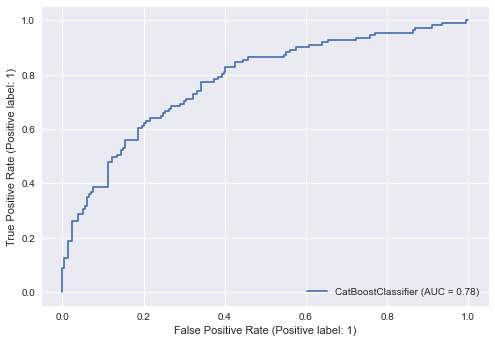

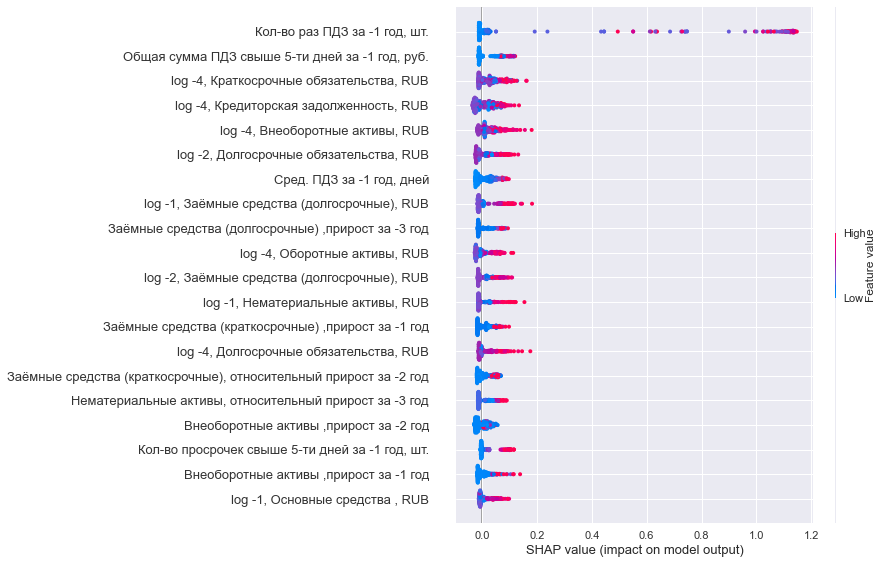

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7763
Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F9438B4C0> with treshold = 0.0...


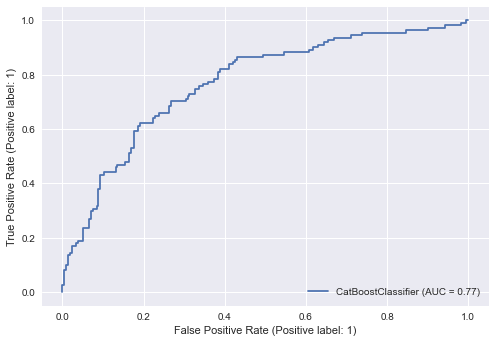

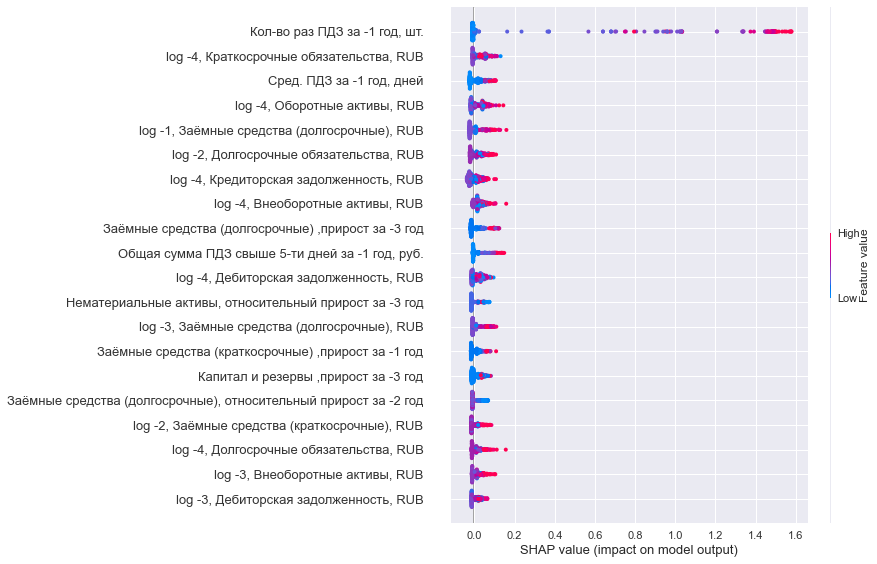

F1 = 0.5093, Precision = 0.3427, Recall = 0.991, Accuracy = 0.3477, ROC_AUC = 0.7691


In [6]:
catboost_fit_predict(df, 'all_features')

## No features

In [7]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False)

In [8]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F94392C10> with treshold = 0.5...


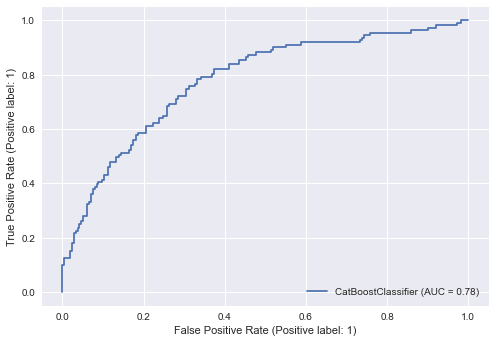

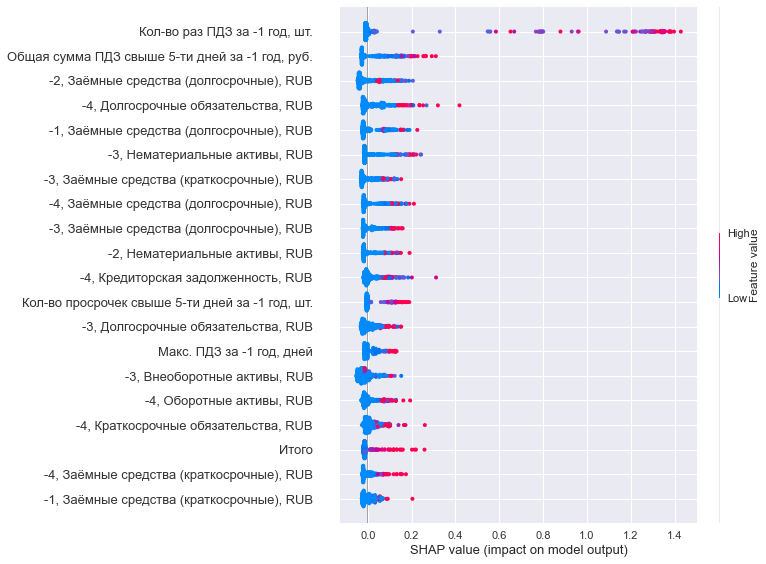

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7785
Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F94392C10> with treshold = 0.0...


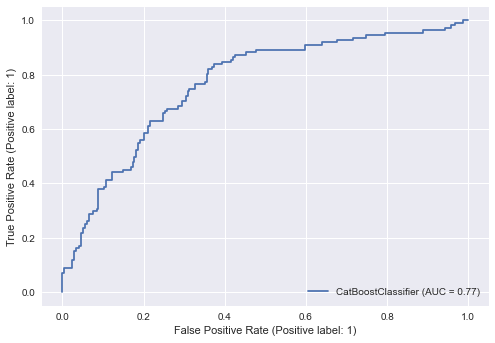

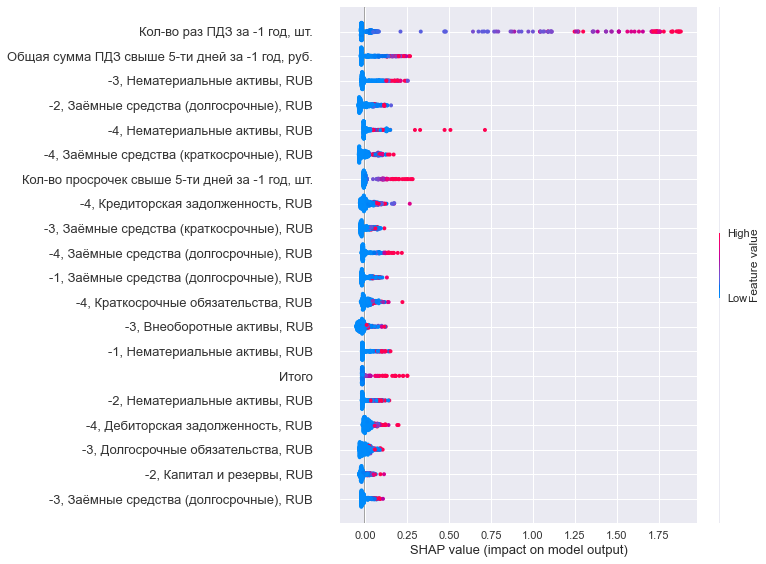

F1 = 0.5606, Precision = 0.4, Recall = 0.9369, Accuracy = 0.4985, ROC_AUC = 0.7666


In [9]:
catboost_fit_predict(df, 'no_features')

## use_diff_features=True

In [10]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False)

In [11]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F95A4C6A0> with treshold = 0.5...


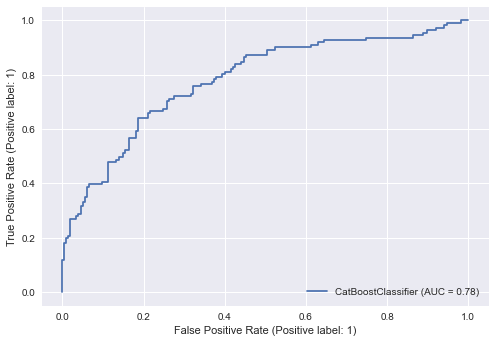

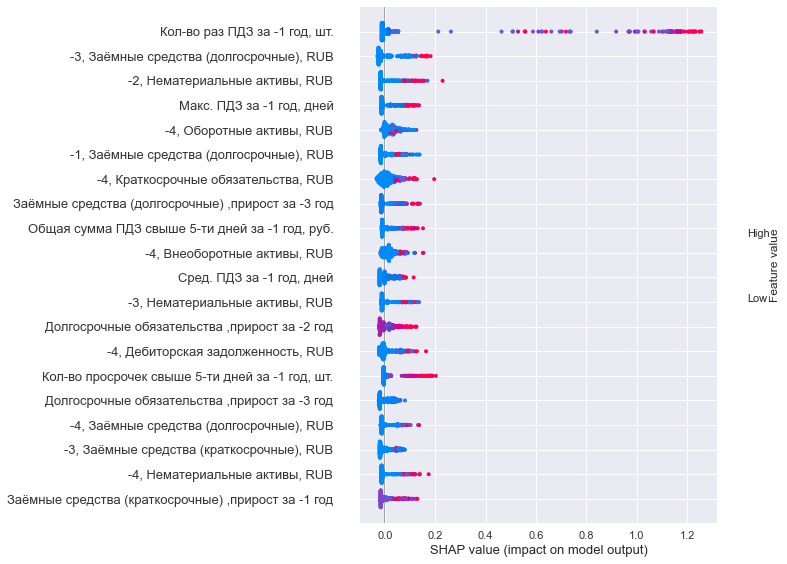

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7807
Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F95A4C6A0> with treshold = 0.0...


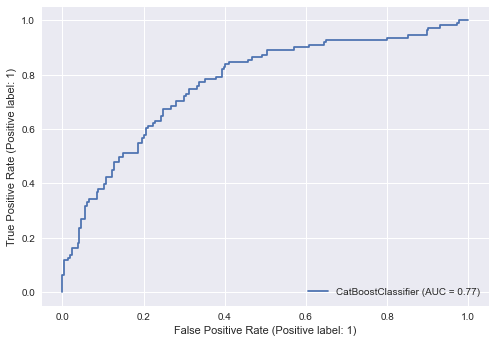

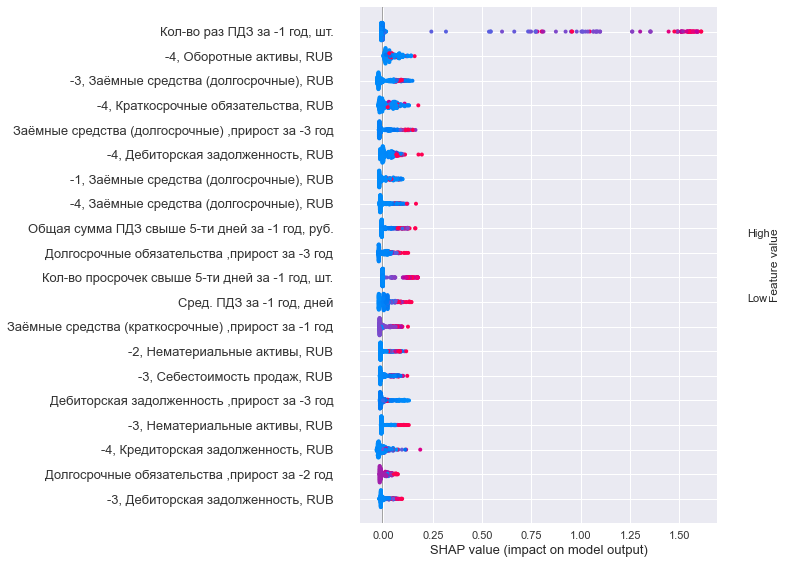

F1 = 0.5568, Precision = 0.3977, Recall = 0.9279, Accuracy = 0.4954, ROC_AUC = 0.768


In [12]:
catboost_fit_predict(df, 'use_diff_features=True')

## use_ratio_features=True

In [13]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=False)

In [14]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=True)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F956EBA60> with treshold = 0.5...


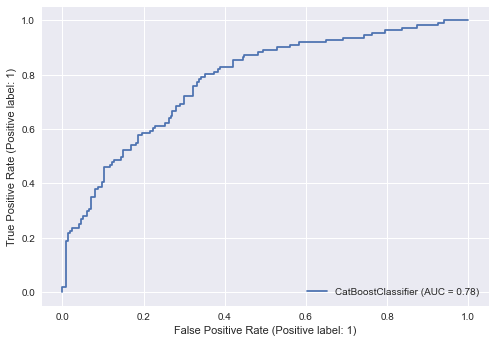

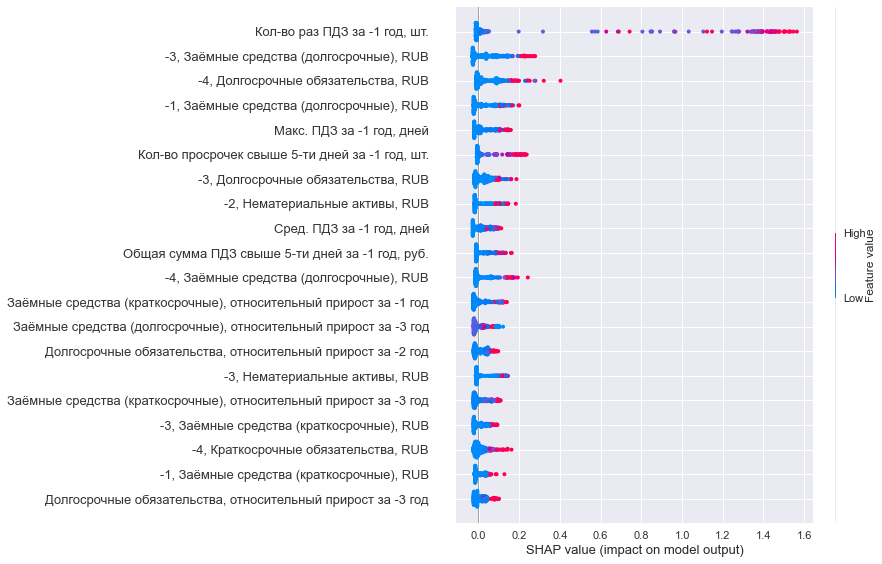

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7789
Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F956EBA60> with treshold = 0.0...


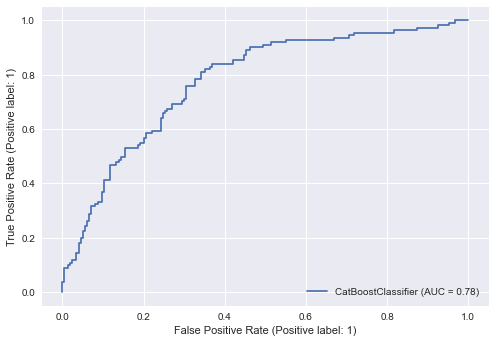

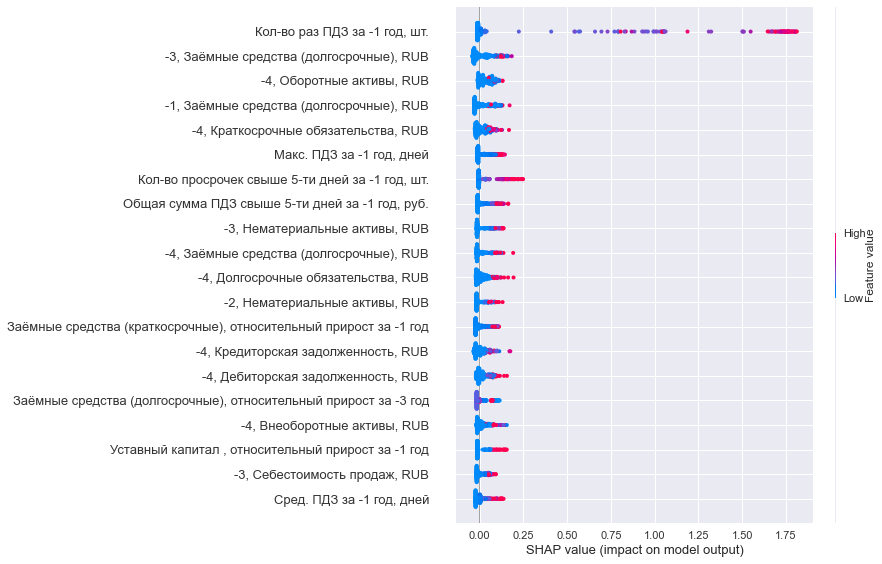

F1 = 0.5422, Precision = 0.3786, Recall = 0.955, Accuracy = 0.4492, ROC_AUC = 0.7773


In [15]:
catboost_fit_predict(df, 'use_ratio_features=True')

## add_growth=True

In [16]:
df = create_df_1year_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False)

In [17]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F941D2F40> with treshold = 0.5...


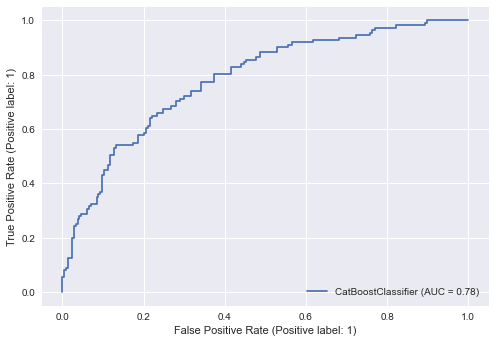

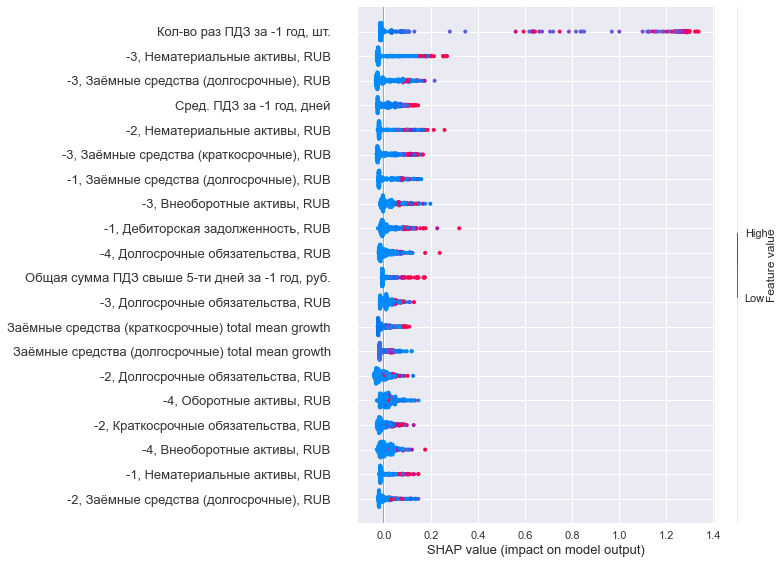

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7818
Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F941D2F40> with treshold = 0.0...


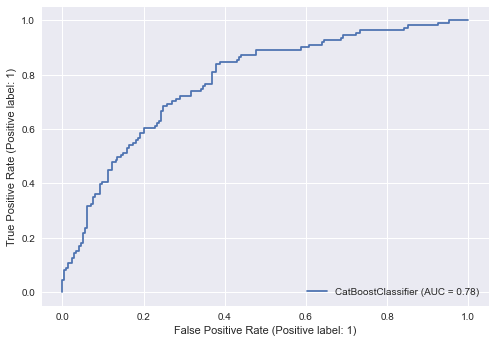

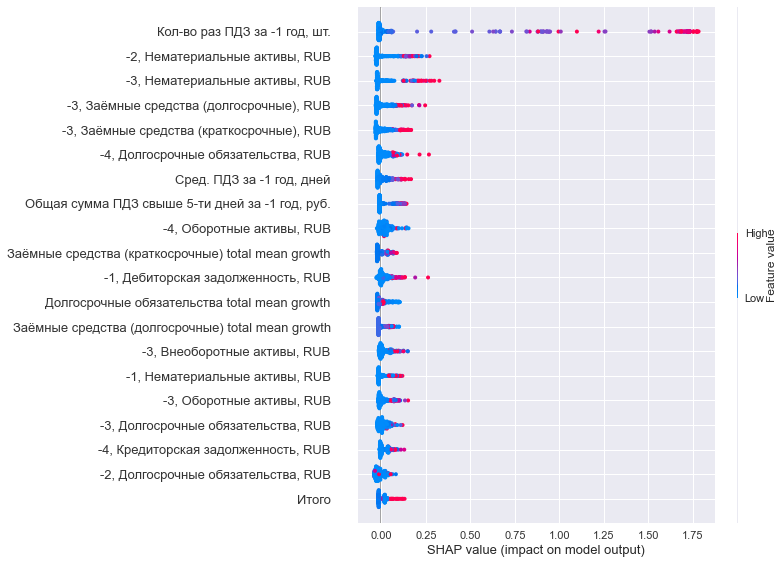

F1 = 0.566, Precision = 0.4038, Recall = 0.9459, Accuracy = 0.5046, ROC_AUC = 0.7768


In [18]:
catboost_fit_predict(df, 'add_growth=True')

## count_log_fin_vals=True

In [19]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=True, normalize_fin_columns=False)

In [20]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F95725A60> with treshold = 0.5...


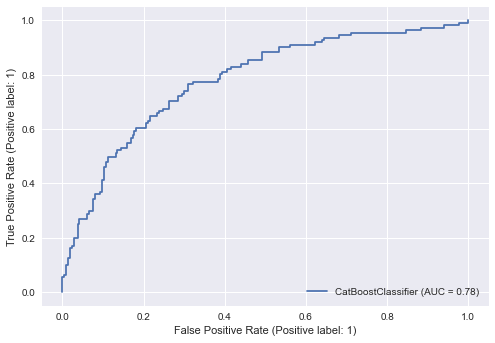

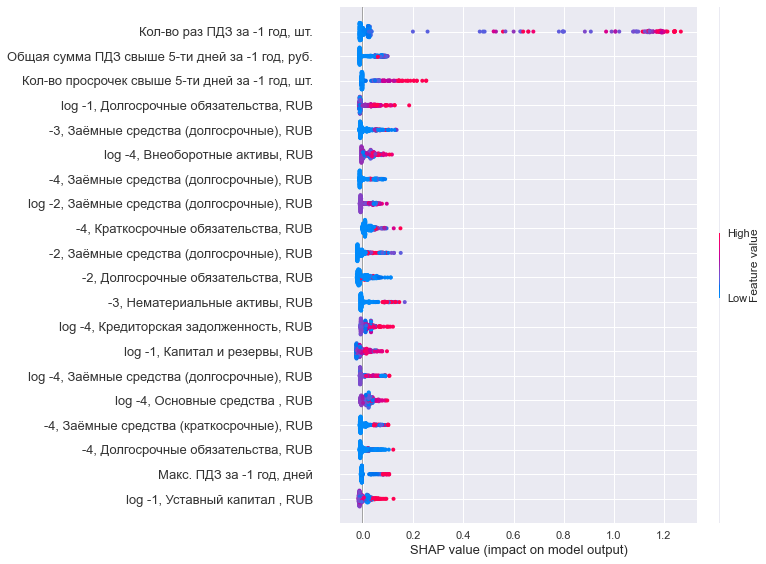

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7795
Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F95725A60> with treshold = 0.0...


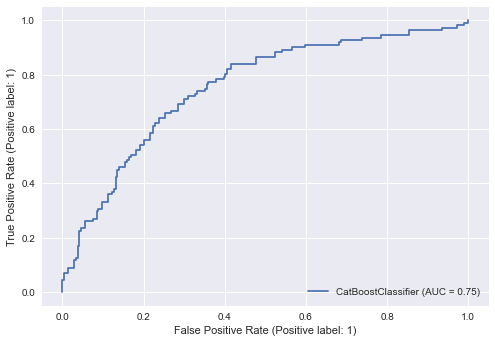

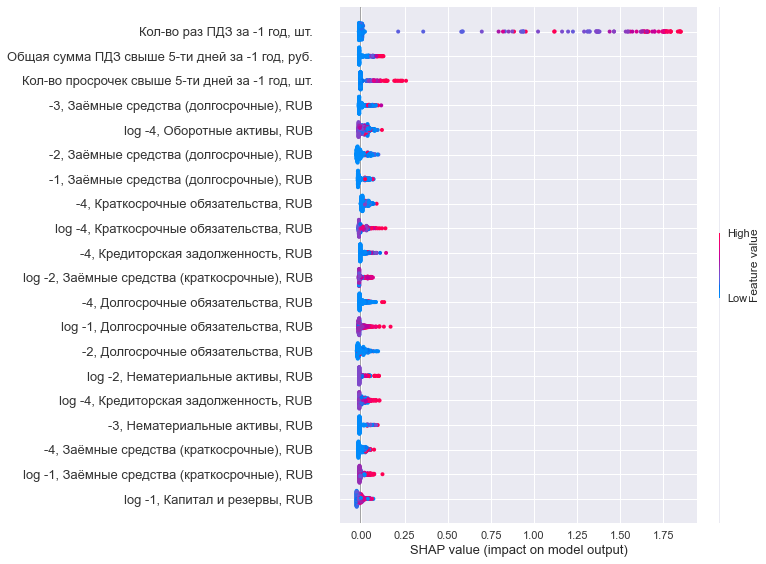

F1 = 0.5568, Precision = 0.3977, Recall = 0.9279, Accuracy = 0.4954, ROC_AUC = 0.7532


In [21]:
catboost_fit_predict(df, 'count_log_fin_vals=True')

## normalize_fin_columns=True

In [22]:
df = create_df_1year_known(add_growth=False, count_log_fin_vals=False, normalize_fin_columns=True)

In [23]:
feat_gen = Feature_gen(-4, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=False, use_ratio_features=False)
df = df.loc[:, [col for col in df.columns if 'Факт' not in col]]

Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F95803F70> with treshold = 0.5...


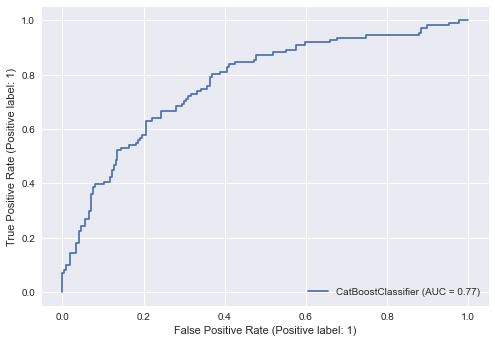

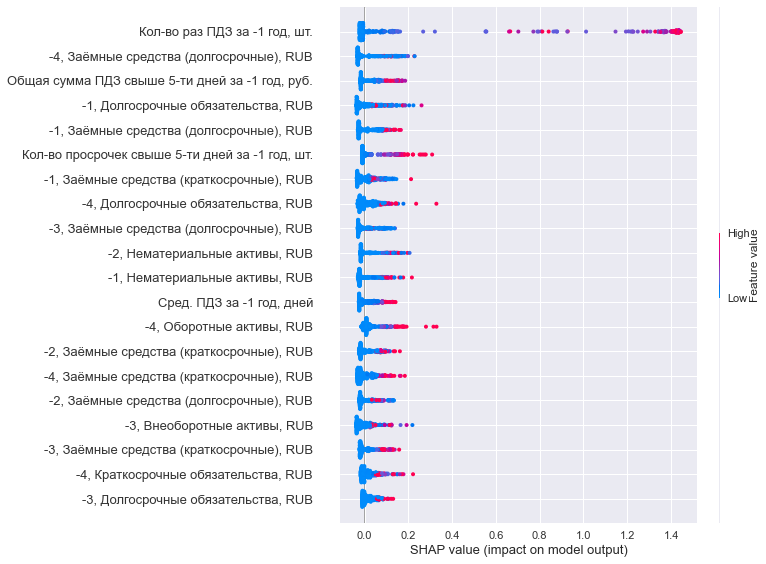

F1 = 0.0, Precision = 0.0, Recall = 0.0, Accuracy = 0.6585, ROC_AUC = 0.7704
Fitting model <catboost.core.CatBoostClassifier object at 0x0000016F95803F70> with treshold = 0.0...


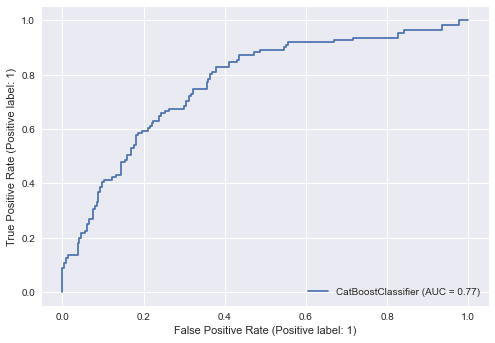

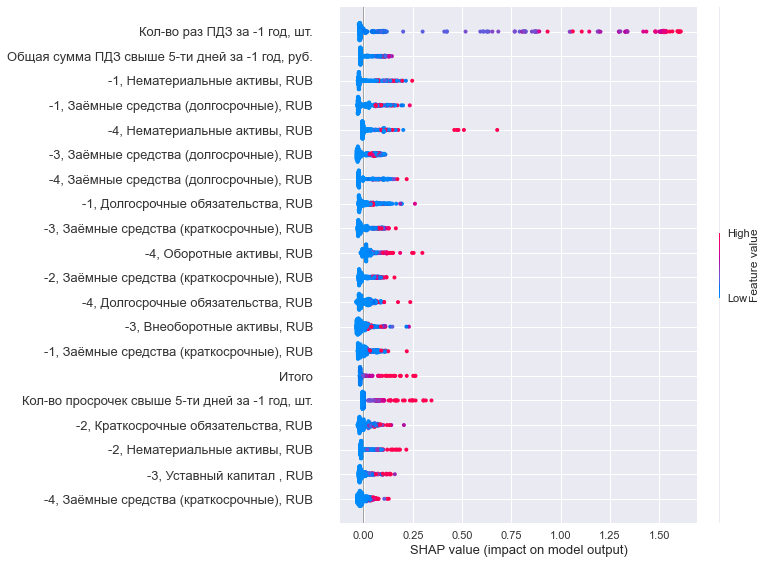

F1 = 0.5403, Precision = 0.3796, Recall = 0.9369, Accuracy = 0.4554, ROC_AUC = 0.7683


In [24]:
catboost_fit_predict(df, 'normalize_fin_columns=True')